In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

In [2]:
data= pd.read_csv('Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### Simple Limear Regression Using Sklearn

In [5]:
x, y = data[['SAT']], data['GPA']
x_matrix= x.values.reshape(-1,1)

In [6]:
reg= LinearRegression()
linear_reg=reg.fit(x_matrix,y)

In [7]:
x.shape

(84, 1)

In [8]:
Coefficient= linear_reg.coef_
Intercept= linear_reg.intercept_
R_squared= linear_reg.score(x_matrix,y)
print(Intercept, Coefficient, R_squared)

0.2750402996602803 [0.00165569] 0.40600391479679765


In [9]:
reg.predict([[1740]])

array([3.15593751])

In [10]:
new_data= pd.DataFrame([1740, 1760], columns=['SAT'])

In [11]:
linear_reg.predict(new_data)

array([3.15593751, 3.18905127])

In [12]:
new_data['Predicted GPA']= linear_reg.predict(new_data)


In [13]:
new_data

,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


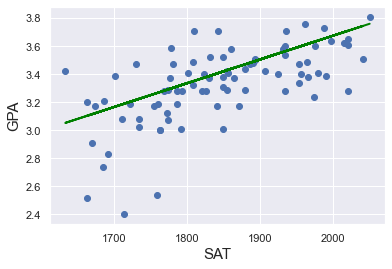

In [14]:
plt.scatter(x,y)
y_hat= 0.275 + 0.0017 * data['SAT']
fig= plt.plot(x, y_hat, lw=2, label= 'regression line', c= 'green')
plt.xlabel('SAT', fontsize= 15)
plt.ylabel('GPA', fontsize= 15)
plt.show()

### Simple Limear Regression Using statsmodels

In [15]:
x11, y1= data['SAT'], data['GPA']
x1= sm.add_constant(x11)

In [16]:
regsm= sm. OLS(y,x1)
lin_reg= regsm.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           7.20e-11
Time:                        09:38:04   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

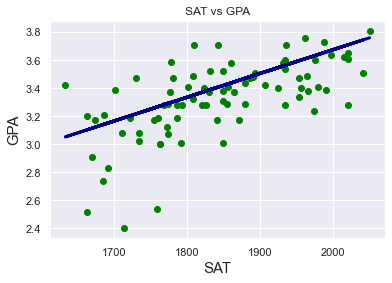

In [17]:
plt.scatter(x11,y, c= 'green')
y_hat= 0.275 + 0.0017 * x11 #This is the line which is closest to all data points.
plt.plot(x11, y_hat, c= 'darkblue', label= 'Regression Line', lw=3)
plt.xlabel('SAT', fontsize=15)
plt.ylabel('GPA', fontsize= 15)
plt.title('SAT vs GPA')
plt.show()